In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics

import time

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3


In [3]:
df.drop(columns=['cluster'], inplace = True)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [4]:
#find number of null entries to see if there is a need to clean the dataset
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

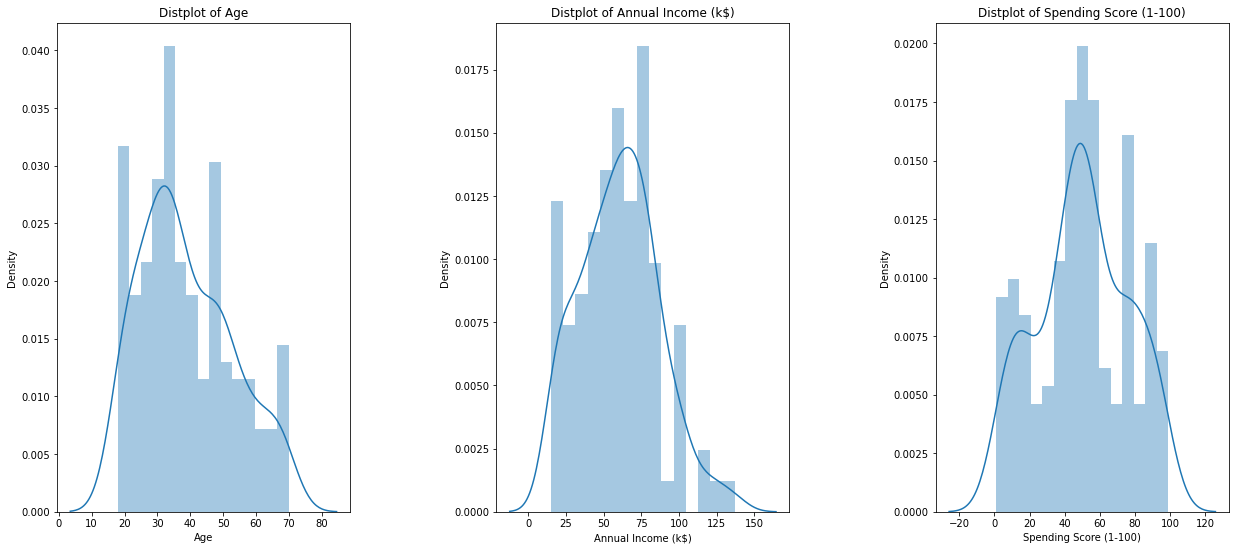

In [6]:
plt.figure(1 , figsize = (21 , 9))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [7]:
#convert gender - Male = 1, Female = 0
label_encoder = preprocessing.LabelEncoder() 
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df2 = df.iloc[:, [1]]
df = df.drop(columns=['CustomerID'])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [8]:
df2

,Gender
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [9]:
df = df.drop(columns=['Gender'])
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [10]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [11]:
scaled_features_df = scaled_features_df.join(df2)
scaled_features_df

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


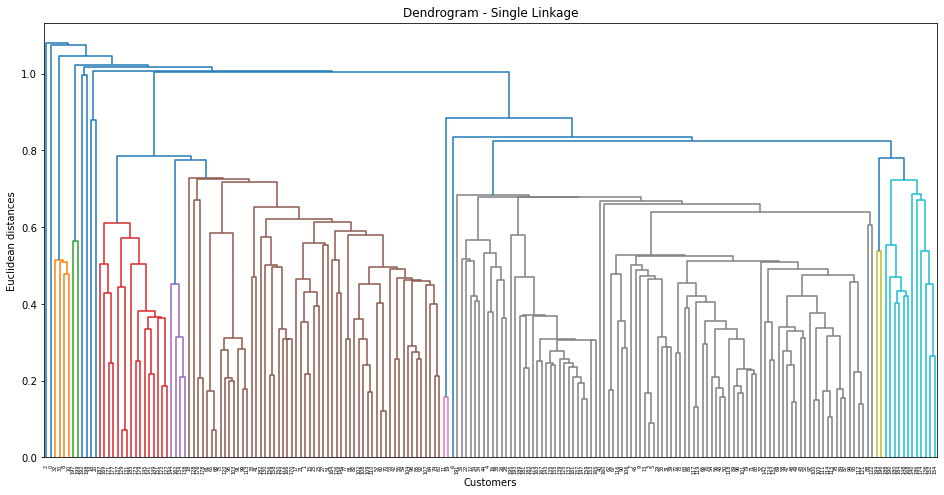

In [12]:
#Agglomerative clustering using single linkage method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "single"))

plt.title('Dendrogram - Single Linkage')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

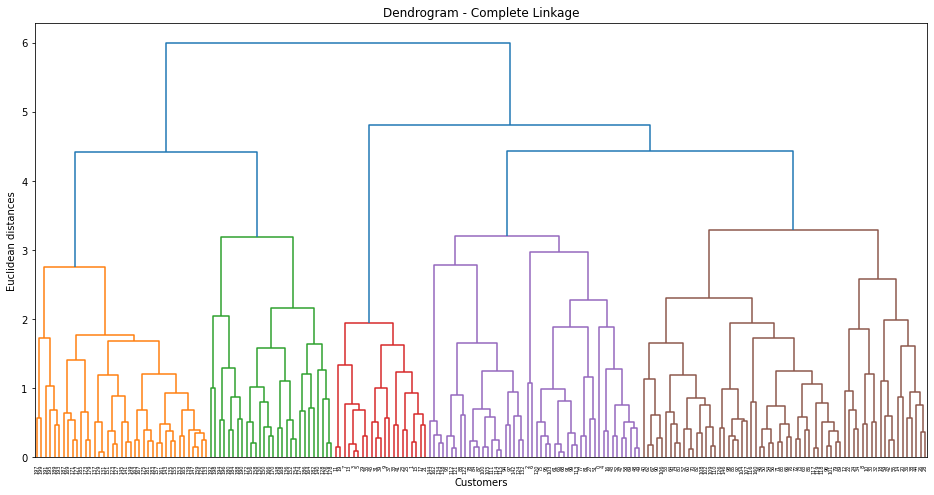

In [13]:
#Agglomerative clustering using complete linkage method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "complete"))

plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

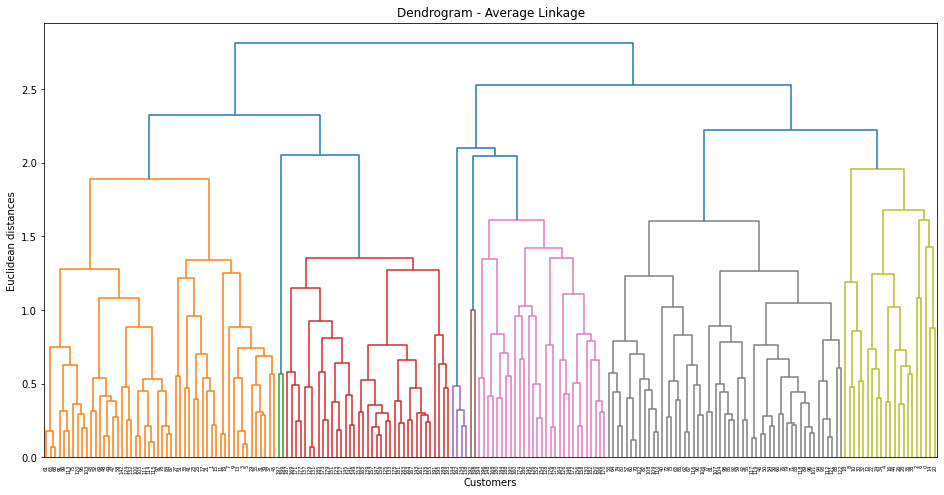

In [14]:
#Agglomerative clustering using average method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "average"))

plt.title('Dendrogram - Average Linkage')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

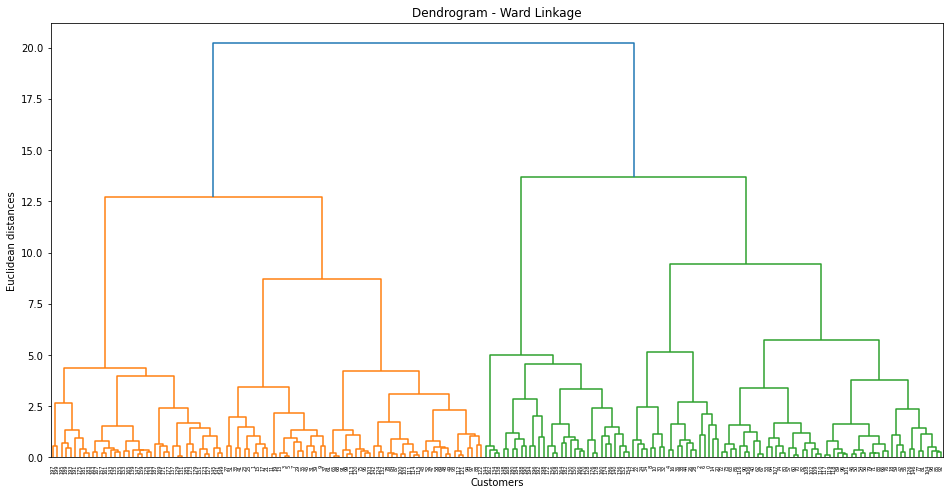

In [15]:
#Agglomerative clustering using ward method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "ward"))

plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [16]:
# import PCA
from sklearn.decomposition import PCA 
# Applying PCA to visualize data
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_features_df)
pca_data

array([[-0.60043766, -1.73717898],
       [-1.64988591, -1.78912423],
       [ 0.31538132, -1.69277231],
       [-1.47798868, -1.78131664],
       [-0.06054496, -1.67869121],
       [-1.5029612 , -1.7438065 ],
       [ 1.07202103, -1.58773793],
       [-1.94718878, -1.72769057],
       [ 2.65927595, -1.4504641 ],
       [-0.99141027, -1.64691155],
       [ 2.50988817, -1.45931005],
       [-1.47785399, -1.67316678],
       [ 1.98742066, -1.47928386],
       [-1.43412929, -1.62698028],
       [ 1.01549562, -1.4775323 ],
       [-1.55292967, -1.59402762],
       [ 0.27232193, -1.5119479 ],
       [-1.2997754 , -1.54249961],
       [ 1.33203751, -1.35564719],
       [-1.45726454, -1.51942393],
       [ 0.30455257, -1.3581841 ],
       [-1.24333274, -1.42787781],
       [ 1.644869  , -1.29854428],
       [-0.94101737, -1.37824333],
       [ 1.79852122, -1.18081367],
       [-1.29406171, -1.27973079],
       [ 0.84929965, -1.22201945],
       [-0.41464999, -1.24030551],
       [ 0.6216485 ,

In [17]:
#Single-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='single')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run single-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
scaled_features_df['cluster'] = pd.DataFrame(y_hc)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

Time taken to run single-linkage agglo. clustering (pre-PCA dataset):  0.003987789154052734
Silhouette score is:  0.22254270181900884
Davies Bouldin score is:  0.5196487838863324
Calinski Harabasz score is:  11.528321952660233


Time taken to run single-linkage agglo. clustering (post-PCA dataset):  0.001993417739868164
Silhouette score is:  0.061083517388606935
Davies Bouldin score is:  0.5283417887089256
Calinski Harabasz score is:  4.1151870790937


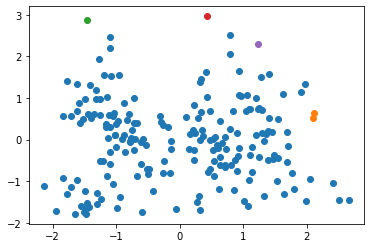

In [18]:
#Single-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='single')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run single-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
scaled_features_df['cluster'] = pd.DataFrame(y_hc)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()

In [19]:
#Complete-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='complete')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run complete-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
scaled_features_df['cluster'] = pd.DataFrame(y_hc)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

Time taken to run complete-linkage agglo. clustering (pre-PCA dataset):  0.003991603851318359
Silhouette score is:  0.42315440618241945
Davies Bouldin score is:  0.8974187942610421
Calinski Harabasz score is:  165.61824541693568


Time taken to run complete-linkage agglo. clustering (post-PCA dataset):  0.00399327278137207
Silhouette score is:  0.37389759301345754
Davies Bouldin score is:  0.9247684591197111
Calinski Harabasz score is:  158.9105757247574


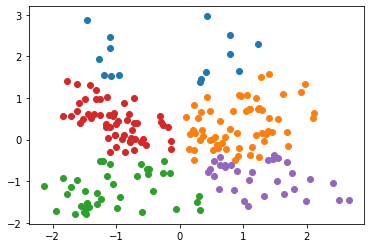

In [20]:
#Complete-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='complete')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run complete-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
scaled_features_df['cluster'] = pd.DataFrame(y_hc)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()

In [21]:
#Average-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run average-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
scaled_features_df['cluster'] = pd.DataFrame(y_hc)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

Time taken to run average-linkage agglo. clustering (pre-PCA dataset):  0.0029914379119873047
Silhouette score is:  0.3801747829178101
Davies Bouldin score is:  0.8955799967569901
Calinski Harabasz score is:  132.48512068192755


Time taken to run average-linkage agglo. clustering (post-PCA dataset):  0.0029909610748291016
Silhouette score is:  0.34588507589813455
Davies Bouldin score is:  0.6970181041129742
Calinski Harabasz score is:  116.03521743401622


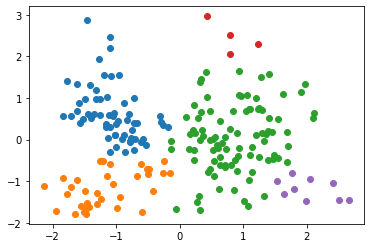

In [22]:
#Average-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run average-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
scaled_features_df['cluster'] = pd.DataFrame(y_hc)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()

In [23]:
#Ward-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run ward-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
scaled_features_df['cluster'] = pd.DataFrame(y_hc)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

Time taken to run ward-linkage agglo. clustering (pre-PCA dataset):  0.0039882659912109375
Silhouette score is:  0.4590431417826769
Davies Bouldin score is:  0.8363334088852662
Calinski Harabasz score is:  134.34739916553445


Time taken to run ward-linkage agglo. clustering (post-PCA dataset):  0.0029926300048828125
Silhouette score is:  0.36494322396560624
Davies Bouldin score is:  0.8446562140629496
Calinski Harabasz score is:  164.8066266148527


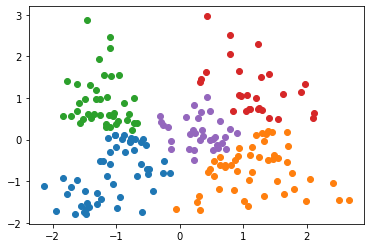

In [26]:
#Ward-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run ward-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
scaled_features_df['cluster'] = pd.DataFrame(y_hc)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()

In [25]:
#Since there are no clustering labels, we will judge the algorithms by using looking at the plotted graphs and the scores
#of the evaluation metrics